In [1]:
using Pkg
Pkg.activate("../.")

  Activating project at `~/Documents/code/julia/CompFin/notebooks`


In [2]:
using CompFin: HeatEquation, solve_pde

In [3]:
# Setup

xmin = 0.0;
xmax = 100.0;
nx = 100;
tmin = 0.0;
tmax = 1.0;
nt = 100;

dt = (tmax - tmin)/nt;
dx = (xmax - xmin)/nx;
t = dt*collect(0:nt);
x = dx*collect(0:nx);

init_cond = x -> (x - xmin)*(xmax - x)/25;
left_bound = t -> -25*t;
right_bound = t -> -25*t;

heat_eq = HeatEquation(init_cond, left_bound, right_bound);

In [4]:
# is the explicit scheme stable?
print(dt/(dx^2))
dt/(dx^2) < 0.5

0.01

true

In [5]:
u = solve_pde(heat_eq, xmin, xmax, nx, tmin, tmax, nt)

101×101 Matrix{Float64}:
   0.0    3.96     7.84     11.64    …  11.64    7.84      3.96       0.0
  -0.25   3.9592   7.8392   11.6392     11.6392  7.8392    3.9592    -0.25
  -0.5    3.95591  7.8384   11.6384     11.6384  7.8384    3.95591   -0.5
  -0.75   3.95017  7.83758  11.6376     11.6376  7.83758   3.95017   -0.75
  -1.0    3.94205  7.8367   11.6368     11.6368  7.8367    3.94205   -1.0
  -1.25   3.93157  7.83576  11.636   …  11.636   7.83576   3.93157   -1.25
  -1.5    3.9188   7.83472  11.6352     11.6352  7.83472   3.9188    -1.5
  -1.75   3.90377  7.83356  11.6344     11.6344  7.83356   3.90377   -1.75
  -2.0    3.88653  7.83227  11.6336     11.6336  7.83227   3.88653   -2.0
  -2.25   3.86712  7.83083  11.6328     11.6328  7.83083   3.86712   -2.25
   ⋮                                 ⋱                                ⋮
 -23.0   -2.58566  6.29853  11.2931     11.2931  6.29853  -2.58566  -23.0
 -23.25  -2.70096  6.25964  11.2826     11.2826  6.25964  -2.70096  -23.25
 -23.5   

In [6]:
using Plots

In [7]:
function plot_diffusion(u::Matrix{Float64}, x::Vector{Float64}, t::Vector{Float64}; fps=15)
    a = Animation()
    plt = surface(title="Heat equation", xlim=(minimum(x), maximum(x)), ylim=(minimum(t), maximum(t)), zlim=(minimum(u), maximum(u)), xlabel="x", ylabel="t", zlabel="u", c=:afmhot)
    for i = 1:length(t)
        plt = surface(x, t[1:i], u[1:i, :], title="Heat equation", xlim=(minimum(x), maximum(x)), ylim=(minimum(t), maximum(t)), zlim=(minimum(u), maximum(u)), xlabel="x", ylabel="t", zlabel="u", c=:afmhot)
        frame(a, plt)
    end
        
    gif(a, fps=fps)
end

plot_diffusion (generic function with 1 method)

┌ Info: Saved animation to /tmp/jl_yN01UxiNgl.gif
└ @ Plots /home/martin/.julia/packages/Plots/rz1WP/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_yN01UxiNgl.gif")
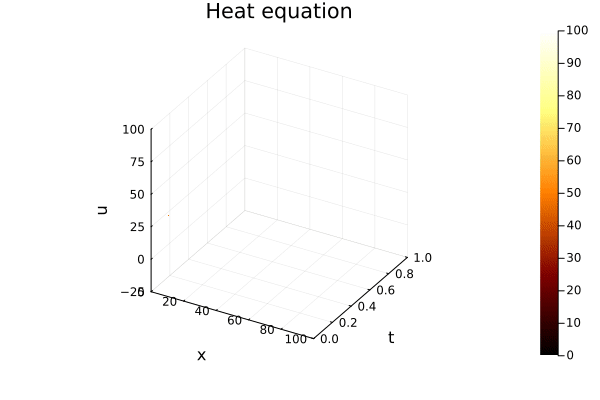

In [8]:
plot_diffusion(u, x, t)